In [47]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import math
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [48]:
# Dataset variables creation
X_train= mnist.train.images
y_train = np.asarray(mnist.train.labels, dtype=np.int32)
X_test = mnist.test.images 
y_test = np.asarray(mnist.test.labels, dtype=np.int32)

In [49]:
# Add required variables for calculation
w = []
n = []
b = []

In [50]:
add_nois = 0.001
digits_mean = []
digits_std = []
prior_prob = []
cov_mat = []

for i in range(10):
    dataset = X_train[y_train[:,i]==1]
    digits_mean.append(np.mean(dataset, axis=0))
    digits_std.append(np.std(dataset, axis=0))
    prior_prob.append(dataset.size/X_train.size)
    
    trans = dataset.T
    trans_cov = np.cov(trans)
    np.fill_diagonal(trans_cov, trans_cov.diagonal() + add_nois)
    cov_mat.append(trans_cov)

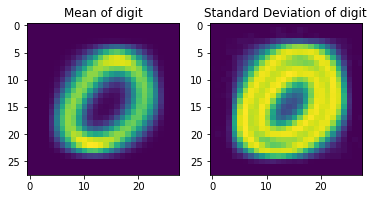

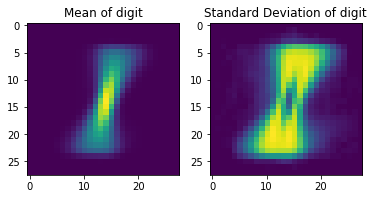

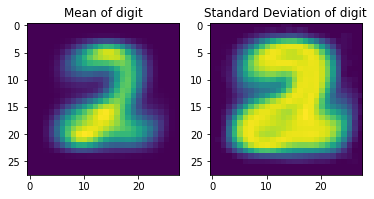

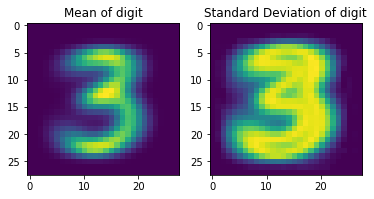

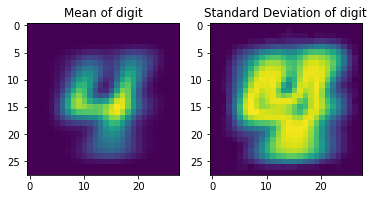

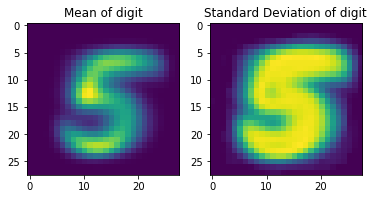

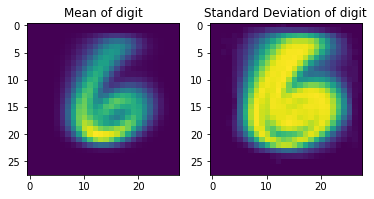

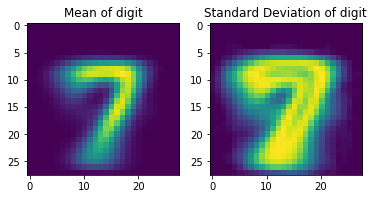

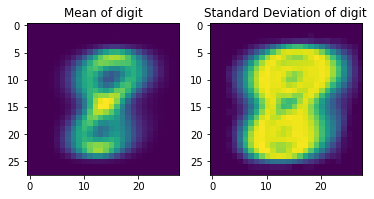

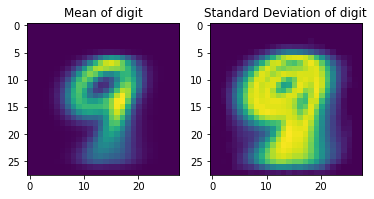

In [51]:
for i in range(10):
    figure, axis = plt.subplots(1,2)
    axis[0].title.set_text("Mean of digit")
    axis[0].imshow(digits_mean[i].reshape(28,28))
    axis[1].title.set_text("Standard Deviation of digit")
    axis[1].imshow(digits_std[i].reshape(28,28))

In [52]:
def findN(dig_mean, covariance):
    for i in range(10):
        dig_mean[i] = dig_mean[i].flatten()
        n.append(np.matmul(np.linalg.inv(covariance[i]), dig_mean[i]))
    return n

In [53]:
def findB(dig_mean, covariance, prr):
    for i in range(10):
        b.append((-0.5 * np.matmul(np.matmul(np.transpose(dig_mean[i]),np.linalg.inv(covariance[i])),dig_mean[i])) - ((0.5)*(np.linalg.slogdet(covariance[i])[1])) + np.log(prr[i]))
    return b


In [54]:
def findW(covariance):
    for i in range(10):
        w.append(-0.5 * np.linalg.inv(covariance[i]))
    return w

In [55]:
def Class_div(x_test, w,n,b):
    y_class = []
    for i in range(len(x_test)):
        g_mat = []
        x = x_test[i]
        x = x.flatten()
        for j in range(10):
            g_mat.append(np.matmul((np.matmul(np.transpose(x), w[j])), x) + np.matmul(np.transpose(n[j]), x)+ b[j])
        g_mat = np.asarray(g_mat)
        y_class.append(np.argmax(g_mat))
    return y_class

In [56]:
def Accuracy(yhat, y_test):
    test_label = []
    for i in range(len(y_test)):
        t = y_test[i]
        for j in range(len(t)):
            if t[j] ==1:
                test_label.append(j)
    acc = accuracy_score(test_label, yhat)
    confusion = confusion_matrix(test_label, yhat)
    return acc, confusion

In [ ]:
accuracy, conf_mat = Accuracy(Class_div(X_test, findW(cov_mat), findN(digits_mean, findW(cov_mat)), findB(digits_mean, cov_mat, prior_prob)), y_test)

In [44]:
print(accuracy)

0.8348


In [45]:
print(conf_mat)

[[ 525    1  240   69   11   32   45    2   53    2]
 [   1 1101    7    3    9    1    7    0    5    1]
 [   2    4  862   78   13    1    5    5   60    2]
 [   1    0   13  813    8   22    1   12  112   28]
 [   0    1   12    1  911    1    2    9    4   41]
 [   0    0    4   52    8  651   13    6  138   20]
 [   2    3    7    3    6   18  908    0   11    0]
 [   0    4   10    6   34    0    0  821    6  147]
 [   4   16   12   29   25   20    3    6  831   28]
 [   0    5    6    9   27    0    0   27   10  925]]



#This classification method does not perform good as compared to other model because this method mainly focuses on data distribution and its shape and considers that the two features are independent of output class given. There seems to be missclassification in the pattern while implementing this model becuase of similar looking digits and thus the error rate gets higher as compared to other classification models.

In [46]:
print("################End of Task 2###########")

################End of Task 2###########
